In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings

In [36]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test_A.csv')

count    3.649700e+04
mean     4.502274e+08
std      1.239699e+10
min      2.000000e+00
25%      8.496209e+05
50%      9.622952e+06
75%      5.874482e+07
max      1.965073e+12
Name: ICO_CUR_MON_ACM_TRX_AMT, dtype: float64

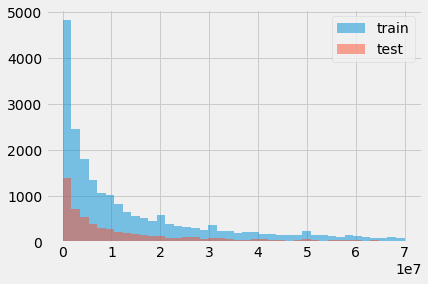

In [31]:
train['ICO_CUR_MON_ACM_TRX_AMT'].describe()
feature = 'ICO_CUR_MON_ACM_TRX_AMT'
tmp = train[feature][train[feature] >60000][train[feature] <70000000]
tmp2 = test[feature][test[feature] >60000][test[feature] <70000000]
plt.hist(tmp, bins=40, label='train',alpha=0.5)
plt.hist(tmp2, bins=40, label='test',alpha=0.5)
plt.legend()
train[feature].describe()

In [22]:
train[['ICO_CUR_MON_ACM_TRX_AMT','LABEL']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ICO_CUR_MON_ACM_TRX_AMT  36497 non-null  float64
 1   LABEL                    40000 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 625.1 KB


<AxesSubplot:xlabel='ICO_CUR_MON_ACM_TRX_AMT'>

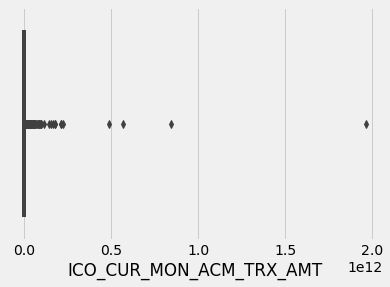

In [32]:
sns.boxplot(x=train['ICO_CUR_MON_ACM_TRX_AMT'])

(array([1783.,  822.,  562.,  447.,  326.,  278.,  219.,  210.,  151.,
         148.,  147.,  133.,  120.,  115.,   77.,   81.,   99.,   66.,
          54.,   97.,   72.,   54.,   65.,   70.,   40.,   56.,   45.,
          39.,   31.,   37.,   35.,   47.,   32.,   29.,   29.,   31.,
          35.,   30.,   28., 2224.]),
 array([6.00020000e+04, 2.55850195e+06, 5.05700190e+06, 7.55550185e+06,
        1.00540018e+07, 1.25525018e+07, 1.50510017e+07, 1.75495017e+07,
        2.00480016e+07, 2.25465016e+07, 2.50450015e+07, 2.75435015e+07,
        3.00420014e+07, 3.25405014e+07, 3.50390013e+07, 3.75375012e+07,
        4.00360012e+07, 4.25345012e+07, 4.50330011e+07, 4.75315011e+07,
        5.00300010e+07, 5.25285010e+07, 5.50270009e+07, 5.75255009e+07,
        6.00240008e+07, 6.25225008e+07, 6.50210007e+07, 6.75195007e+07,
        7.00180006e+07, 7.25165006e+07, 7.50150005e+07, 7.75135005e+07,
        8.00120004e+07, 8.25105004e+07, 8.50090003e+07, 8.75075002e+07,
        9.00060002e+07, 9.2504

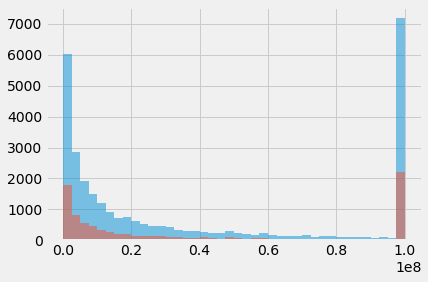

In [51]:
def drop_outliers(x):
    if x <= 60000:
        return None
    elif x >= 100000000:
        return 100000000
    else:
        return x


train['ICO_CUR_MON_ACM_TRX_AMT'] = train['ICO_CUR_MON_ACM_TRX_AMT'].apply(drop_outliers)
test['ICO_CUR_MON_ACM_TRX_AMT'] = test['ICO_CUR_MON_ACM_TRX_AMT'].apply(drop_outliers)
train['ICO_CUR_MON_ACM_TRX_AMT'].describe()

plt.hist(train['ICO_CUR_MON_ACM_TRX_AMT'], bins=40, label='train',alpha=0.5)
plt.hist(test['ICO_CUR_MON_ACM_TRX_AMT'], bins=40, label='test',alpha=0.5)

2.0          35499
200002.0       116
500002.0       116
1000002.0       91
100002.0        73
             ...  
3991892.0        1
7262952.0        1
285002.0         1
1818002.0        1
260946.0         1
Name: COUNTER_CUR_YEAR_CNT_AMT, Length: 1592, dtype: int64

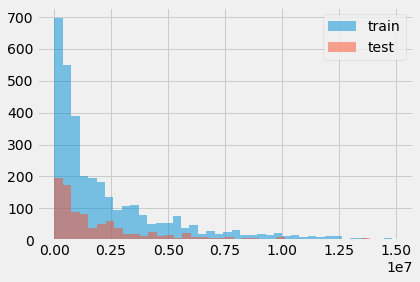

In [43]:

train['COUNTER_CUR_YEAR_CNT_AMT'].describe()
feature = 'COUNTER_CUR_YEAR_CNT_AMT'
tmp = train[feature][train[feature] >6000][train[feature] <15000000]
tmp2 = test[feature][test[feature] >6000][test[feature] <15000000]
plt.hist(tmp, bins=40, label='train',alpha=0.5)
plt.hist(tmp2, bins=40, label='test',alpha=0.5)
plt.legend()
train[feature].value_counts()

In [47]:
train['COUNTER_CUR_YEAR_CNT_AMT'] = train['COUNTER_CUR_YEAR_CNT_AMT'].apply(lambda x: None if x< 100 else x)
test['COUNTER_CUR_YEAR_CNT_AMT'] = test['COUNTER_CUR_YEAR_CNT_AMT'].apply(lambda x: None if x< 100 else x)

(array([665., 167.,  72.,  41.,  30.,  19.,  10.,   8.,   7.,   4.,   3.,
          2.,   1.,   1.,   2.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.02780000e+03, 2.49033415e+06, 4.97964051e+06, 7.46894686e+06,
        9.95825322e+06, 1.24475596e+07, 1.49368659e+07, 1.74261723e+07,
        1.99154786e+07, 2.24047850e+07, 2.48940914e+07, 2.73833977e+07,
        2.98727041e+07, 3.23620104e+07, 3.48513168e+07, 3.73406231e+07,
        3.98299295e+07, 4.23192358e+07, 4.48085422e+07, 4.72978485e+07,
        4.97871549e+07, 5.22764613e+07, 5.47657676e+07, 5.72550740e+07,
        5.97443803e+07, 6.22336867e+07, 6.47229930e+07, 6.72122994e+07,
        6.97016057e+07, 7.21909121e+07, 7.46802185e+07, 7.71695248e+07,
        7.96588312e+07, 8.21481375e+07, 8.46374439e+07, 8.71267502e+07,
        8.96160566e+07, 9.21053629e+07, 9.45946693e+07, 9.70839756e+07,
      

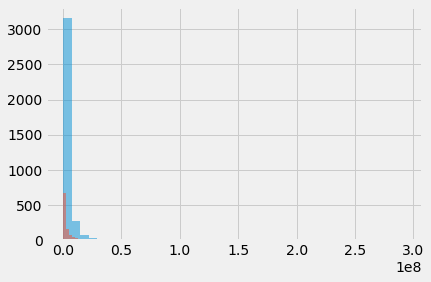

In [49]:
feature = 'COUNTER_CUR_YEAR_CNT_AMT'
tmp = train[feature]#[train[feature] >6000][train[feature] <15000000]
tmp2 = test[feature]#[test[feature] >6000][test[feature] <15000000]
plt.hist(tmp, bins=40, label='train',alpha=0.5)
plt.hist(tmp2, bins=40, label='test',alpha=0.5)

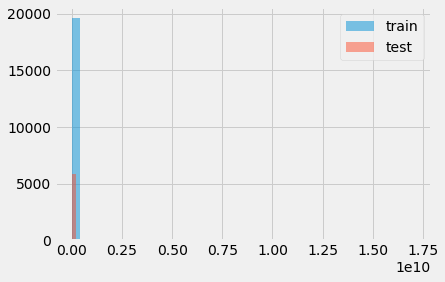

In [64]:

train['PUB_TO_PRV_TRX_AMT_CUR_YEAR'].describe()
feature = 'PUB_TO_PRV_TRX_AMT_CUR_YEAR'
tmp = train[feature][train[feature] >6000][train[feature] <15000000]
tmp2 = test[feature][test[feature] >6000][test[feature] <15000000]
plt.hist(tmp, bins=40, label='train',alpha=0.5)
plt.hist(tmp2, bins=40, label='test',alpha=0.5)
plt.legend()
#train['PUB_TO_PRV_TRX_AMT_CUR_YEAR'].value_counts()


In [61]:
train['PUB_TO_PRV_TRX_AMT_CUR_YEAR'] = train['PUB_TO_PRV_TRX_AMT_CUR_YEAR'].apply(lambda x: None if x< 1000 else x)
test['PUB_TO_PRV_TRX_AMT_CUR_YEAR'] = test['PUB_TO_PRV_TRX_AMT_CUR_YEAR'].apply(lambda x: None if x< 1000 else x)

In [66]:
train['MON_12_EXT_SAM_TRSF_IN_AMT'] = train['MON_12_EXT_SAM_TRSF_IN_AMT'].apply(lambda x: None if x< 1000 else x)
test['MON_12_EXT_SAM_TRSF_IN_AMT'] = test['MON_12_EXT_SAM_TRSF_IN_AMT'].apply(lambda x: None if x< 1000 else x)
train['MON_12_EXT_SAM_TRSF_OUT_AMT'] = train['MON_12_EXT_SAM_TRSF_OUT_AMT'].apply(lambda x: None if x< 1000 else x)
test['MON_12_EXT_SAM_TRSF_OUT_AMT'] = test['MON_12_EXT_SAM_TRSF_OUT_AMT'].apply(lambda x: None if x< 1000 else x)

In [73]:
train['MON_12_EXT_SAM_AMT'] = train['MON_12_EXT_SAM_AMT'].apply(lambda x: None if x< 1000 else x)
test['MON_12_EXT_SAM_AMT'] = test['MON_12_EXT_SAM_AMT'].apply(lambda x: None if x< 1000 else x)
train['CUR_MON_EXT_SAM_CUST_TRSF_IN_AMT'] = train['CUR_MON_EXT_SAM_CUST_TRSF_IN_AMT'].apply(lambda x: None if x< 1000 else x)
test['CUR_MON_EXT_SAM_CUST_TRSF_IN_AMT'] = test['CUR_MON_EXT_SAM_CUST_TRSF_IN_AMT'].apply(lambda x: None if x< 1000 else x)
train['CUR_MON_EXT_SAM_CUST_TRSF_OUT_AMT'] = train['CUR_MON_EXT_SAM_CUST_TRSF_OUT_AMT'].apply(lambda x: None if x< 1000 else x)
test['CUR_MON_EXT_SAM_CUST_TRSF_OUT_AMT'] = test['CUR_MON_EXT_SAM_CUST_TRSF_OUT_AMT'].apply(lambda x: None if x< 1000 else x)


In [74]:
train['CUR_MON_EXT_SAM_CUST_TRSF_IN_AMT'].value_counts()

10000002.0     249
20000002.0     194
5000002.0      180
50000002.0     134
100000002.0    124
              ... 
17770002.0       1
80349362.3       1
146191002.0      1
96200002.0       1
4177822.0        1
Name: CUR_MON_EXT_SAM_CUST_TRSF_IN_AMT, Length: 3165, dtype: int64

In [76]:
# LAST_12_MON_COR_DPS_TM_PNT_BAL_PEAK_VAL
# LAST_12_MON_COR_DPS_DAY_AVG_BAL
# CUR_YEAR_COUNTER_ENCASH_CNT


train['LAST_12_MON_COR_DPS_TM_PNT_BAL_PEAK_VAL'] = train['LAST_12_MON_COR_DPS_TM_PNT_BAL_PEAK_VAL'].apply(lambda x: None if x< 3 else x)
test['LAST_12_MON_COR_DPS_TM_PNT_BAL_PEAK_VAL'] = test['LAST_12_MON_COR_DPS_TM_PNT_BAL_PEAK_VAL'].apply(lambda x: None if x< 3 else x)
train['LAST_12_MON_COR_DPS_DAY_AVG_BAL'] = train['LAST_12_MON_COR_DPS_DAY_AVG_BAL'].apply(lambda x: None if x< 3 else x)
test['LAST_12_MON_COR_DPS_DAY_AVG_BAL'] = test['LAST_12_MON_COR_DPS_DAY_AVG_BAL'].apply(lambda x: None if x< 3 else x)
train['CUR_YEAR_COUNTER_ENCASH_CNT'] = train['CUR_YEAR_COUNTER_ENCASH_CNT'].apply(lambda x: None if x< 3 else x)
test['CUR_YEAR_COUNTER_ENCASH_CNT'] = test['CUR_YEAR_COUNTER_ENCASH_CNT'].apply(lambda x: None if x< 3 else x)

In [77]:
# CUR_MON_COR_DPS_MON_DAY_AVG_BAL
# CUR_YEAR_COR_DMND_DPS_DAY_AVG_BAL
# CUR_YEAR_COR_DPS_YEAR_DAY_AVG_INCR
# LAST_12_MON_DIF_NM_MON_AVG_TRX_AMT_NAV
# LAST_12_MON_MON_AVG_TRX_AMT_NAV


train['CUR_MON_COR_DPS_MON_DAY_AVG_BAL'] = train['CUR_MON_COR_DPS_MON_DAY_AVG_BAL'].apply(lambda x: None if x< 3 else x)
test['CUR_MON_COR_DPS_MON_DAY_AVG_BAL'] = test['CUR_MON_COR_DPS_MON_DAY_AVG_BAL'].apply(lambda x: None if x< 3 else x)
train['CUR_YEAR_COR_DMND_DPS_DAY_AVG_BAL'] = train['CUR_YEAR_COR_DMND_DPS_DAY_AVG_BAL'].apply(lambda x: None if x< 3 else x)
test['CUR_YEAR_COR_DMND_DPS_DAY_AVG_BAL'] = test['CUR_YEAR_COR_DMND_DPS_DAY_AVG_BAL'].apply(lambda x: None if x< 3 else x)
train['CUR_YEAR_COR_DPS_YEAR_DAY_AVG_INCR'] = train['CUR_YEAR_COR_DPS_YEAR_DAY_AVG_INCR'].apply(lambda x: None if x< 3 else x)
test['CUR_YEAR_COR_DPS_YEAR_DAY_AVG_INCR'] = test['CUR_YEAR_COR_DPS_YEAR_DAY_AVG_INCR'].apply(lambda x: None if x< 3 else x)
train['LAST_12_MON_DIF_NM_MON_AVG_TRX_AMT_NAV'] = train['LAST_12_MON_DIF_NM_MON_AVG_TRX_AMT_NAV'].apply(lambda x: None if x< 3 else x)
test['LAST_12_MON_DIF_NM_MON_AVG_TRX_AMT_NAV'] = test['LAST_12_MON_DIF_NM_MON_AVG_TRX_AMT_NAV'].apply(lambda x: None if x< 3 else x)
train['LAST_12_MON_MON_AVG_TRX_AMT_NAV'] = train['LAST_12_MON_MON_AVG_TRX_AMT_NAV'].apply(lambda x: None if x< 3 else x)
test['LAST_12_MON_MON_AVG_TRX_AMT_NAV'] = test['LAST_12_MON_MON_AVG_TRX_AMT_NAV'].apply(lambda x: None if x< 3 else x)

In [78]:
train.to_csv('./data/train.csv',index=None)
test.to_csv('./data/test_A.csv',index=None)